Epoch [1/5], Loss: 0.2413
Epoch [2/5], Loss: 0.0660
Epoch [3/5], Loss: 0.0444
Epoch [4/5], Loss: 0.0337
Epoch [5/5], Loss: 0.0285


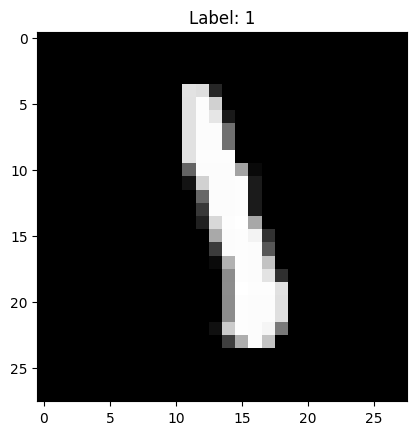

شبکه پیش‌بینی کرد: 0  |  برچسب واقعی: 1
دقت شبکه روی دیتاست تست: 6.29%
دقت شبکه روی دیتاست تست: 6.29%


In [1]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

class SimpleCNN(nn.Module): #1
    def __init__(self): #1
        super(SimpleCNN, self).__init__() #1
        # Conv layer
        self.conv1 = nn.Conv2d( #2
            in_channels=1,  #2
            out_channels=16, #2
            kernel_size=3, #2
            stride=1, #2
            padding=1 #2
        ) #2
        self.relu = nn.ReLU() #3
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2) #5
        self.conv2 = nn.Conv2d( #7
            in_channels=16,  #7
            out_channels=32,  #7
            kernel_size=3,  #7
            stride=1,  #7
            padding=1 #7
        ) #7
        self.relu = nn.ReLU() #7
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2) #9
        # Dense layer
        self.fc1 = nn.Linear(32 * 7 * 7, 128) #11
        self.relu_fc1 = nn.ReLU() #12
        self.fc2 = nn.Linear(128, 10) #13


    def forward(self, x): #4
        x = self.conv1(x) #4
        x = self.relu(x) #4
        x = self.pool(x) #6
        x = self.conv2(x) #8
        x = self.relu(x) #8
        x = self.pool2(x) #10
        x = torch.flatten(x, 1) #11
        x = self.fc1(x) #11
        x = self.relu_fc1(x) #11
        x = self.fc2(x) #14
        return x #4
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)

# ← اینجا اضافه کن
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# تبدیل تصویر به Tensor
transform = transforms.Compose([
    transforms.ToTensor()
])

# بارگذاری دیتاست تست MNIST
test_dataset = torchvision.datasets.MNIST(
    root=r"D:\GitHubProjects\Daily-Neural-Network-Exercise\data\mnist_standard",  # پوشه استاندارد MNIST
    train=False,        # دیتاست تست
    download=True,      # اگر فایل‌ها موجود نبود، دانلود می‌کند
    transform=transform
)
# دیتاست آموزش
train_dataset = torchvision.datasets.MNIST(
    root=r"D:\GitHubProjects\Daily-Neural-Network-Exercise\data\mnist_standard",
    train=True,        # ← دیتاست آموزشی
    download=True,
    transform=transform
)

# DataLoader برای آموزش
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=64,     # تعداد تصویر در هر batch
    shuffle=True       # جابجایی تصادفی تصاویر
)

# ساخت DataLoader
test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=1,
    shuffle=True)
num_epochs = 5  # تعداد دوره‌های آموزش

for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

# 4. گرفتن یک نمونه از دیتاست
images, labels = next(iter(test_loader))

# 5. نمایش تصویر
plt.imshow(images[0][0], cmap="gray")
plt.title(f"Label: {labels.item()}")
plt.show()

# 6. عبور از شبکه
model = SimpleCNN()   # شبکه‌ای که قبلا تعریف کردیم
model.eval()    # حالت ارزیابی (غیر آموزشی)

with torch.no_grad():
    outputs = model(images)          # خروجی شبکه
    _, predicted = torch.max(outputs, 1)  # گرفتن کلاس پیش‌بینی‌شده

print(f"شبکه پیش‌بینی کرد: {predicted.item()}  |  برچسب واقعی: {labels.item()}")
correct = 0
total = 0

# 2. بدون محاسبه گرادیان
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)                  # عبور تصویر از شبکه
        _, predicted = torch.max(outputs, 1)    # گرفتن کلاس پیش‌بینی شده
        total += labels.size(0)                 # جمع تعداد نمونه‌ها
        correct += (predicted == labels).sum().item()  # جمع تعداد پیش‌بینی درست

# 3. محاسبه دقت
accuracy = 100 * correct / total
print(f"دقت شبکه روی دیتاست تست: {accuracy:.2f}%")
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
accuracy = 100 * correct / total
print(f"دقت شبکه روی دیتاست تست: {accuracy:.2f}%")
